In [1]:
import os
import time
import pandas as pd
import numpy as np
import datashader as ds
import datashader.transfer_functions as tf
from sklearn.cluster import MiniBatchKMeans

In [2]:
# Load from HDF5 file

project = os.path.realpath('./..')
datadir = os.path.join(project, 'data')

with pd.HDFStore(os.path.join(datadir, 'tweets_1M.h5')) as store:
    subset = store.tweets_subset

In [3]:
# Convert the lat and lng columns to numpy array
data = subset.as_matrix(columns=['lat', 'lng'])

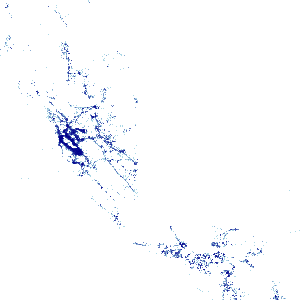

In [4]:
# Visualize points with datashader

cvs = ds.Canvas(plot_width=300, plot_height=300)
agg = cvs.points(subset, 'lng', 'lat')
tf.interpolate(agg)

In [7]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

def minibatchtest(b):
    mini_batch = MiniBatchKMeans(n_clusters=100,
                                 init='k-means++',
                                 n_init=10,
                                 batch_size=b)
    t0 = time.time()
    mini_batch.fit(data)
    mini_batch_time = time.time() - t0
    print 'batch size {}, time: {}'.format(b, mini_batch_time)

In [9]:
minibatchtest(5)
minibatchtest(10)
minibatchtest(20)
minibatchtest(50)
minibatchtest(100)
minibatchtest(500)
minibatchtest(1000)

batch size 5, time: 5.28796601295
batch size 10, time: 2.83964586258
batch size 20, time: 2.68717598915
batch size 50, time: 1.48130607605
batch size 100, time: 0.738296031952
batch size 500, time: 0.631909132004
batch size 1000, time: 0.703566074371


In [9]:
# Add fitted label back into DataFrame
subset['cluster'] = mini_batch.labels_

0.160804033279


/home/paul/anaconda2/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:1279: DeprecationWarning: This function is deprecated. Please call randint(0, 99999 + 1) instead
  0, n_samples - 1, init_size)
/home/paul/anaconda2/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:630: DeprecationWarning: This function is deprecated. Please call randint(0, 99999 + 1) instead
  0, n_samples - 1, init_size)
/home/paul/anaconda2/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:630: DeprecationWarning: This function is deprecated. Please call randint(0, 99999 + 1) instead
  0, n_samples - 1, init_size)
/home/paul/anaconda2/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:630: DeprecationWarning: This function is deprecated. Please call randint(0, 99999 + 1) instead
  0, n_samples - 1, init_size)
/home/paul/anaconda2/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:630: DeprecationWarning: This function is deprecated. Please call randint(0, 99999 + 1) instead
  0, n_sam

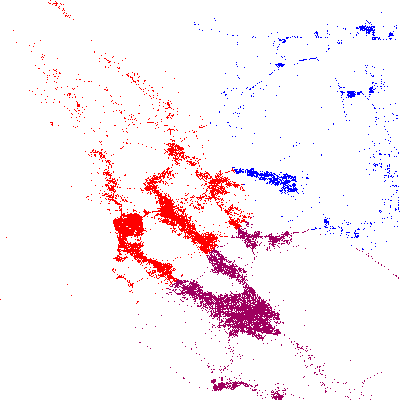

In [10]:
# Visualize points with datashader
cvs = ds.Canvas(plot_width=400, plot_height=400)
agg = cvs.points(subset, 'lng', 'lat', ds.mean('cluster'))
tf.interpolate(agg, cmap=['red', 'blue'])